
 --------------------------------------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------------------------------------- 

Data aplicativos móviles

 --------------------------------------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------------------------------------- 

Información Confidencial Flash


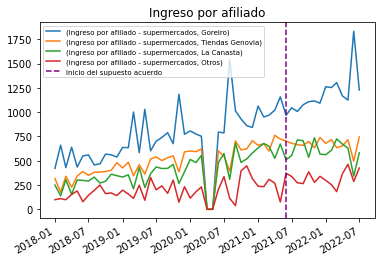

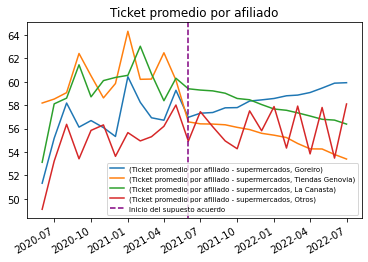

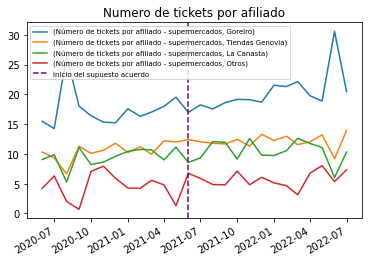

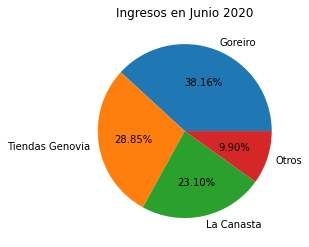

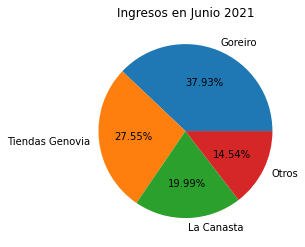

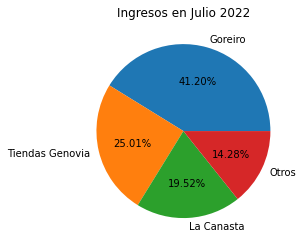

 --------------------------------------------------------------------------------------------------------------- 
 ARIMA(0,1,1)(0,0,0)[0] intercept


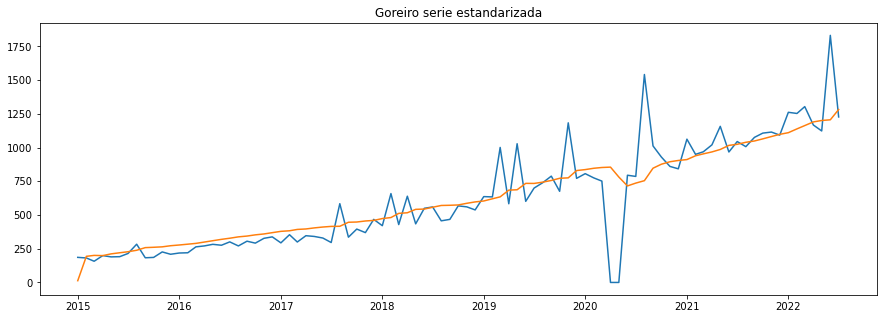

 --------------------------------------------------------------------------------------------------------------- 
 ARIMA(0,1,3)(0,0,0)[0]          


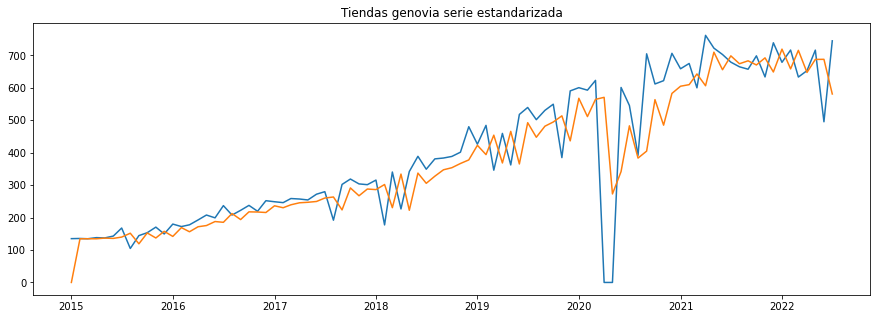

 --------------------------------------------------------------------------------------------------------------- 
 ARIMA(0,1,2)(0,0,0)[0] intercept


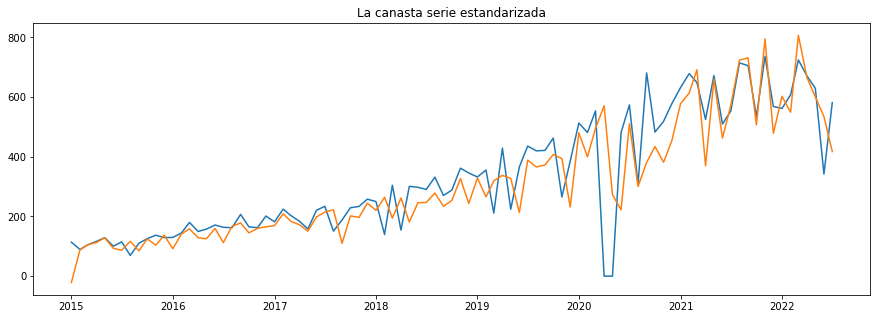

 --------------------------------------------------------------------------------------------------------------- 


C:\Users\user\AppData\Local\Temp/ipykernel_11912/950647489.py:179: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  pyplot.tight_layout()


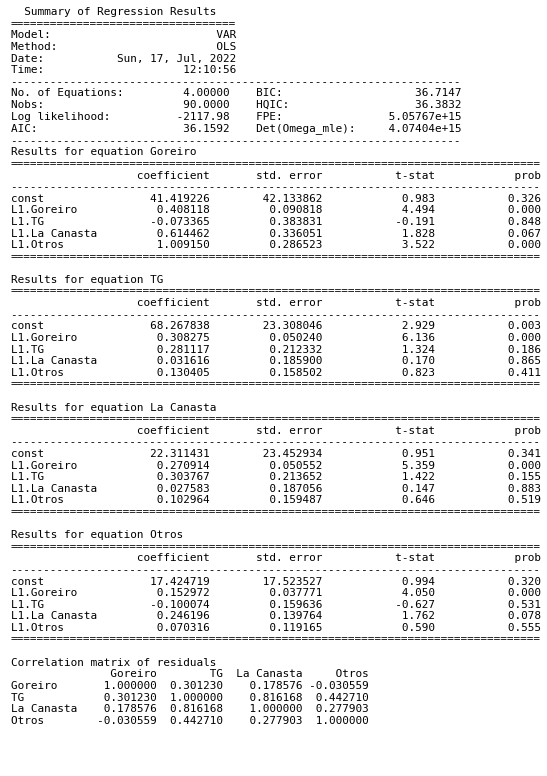

 --------------------------------------------------------------------------------------------------------------- 


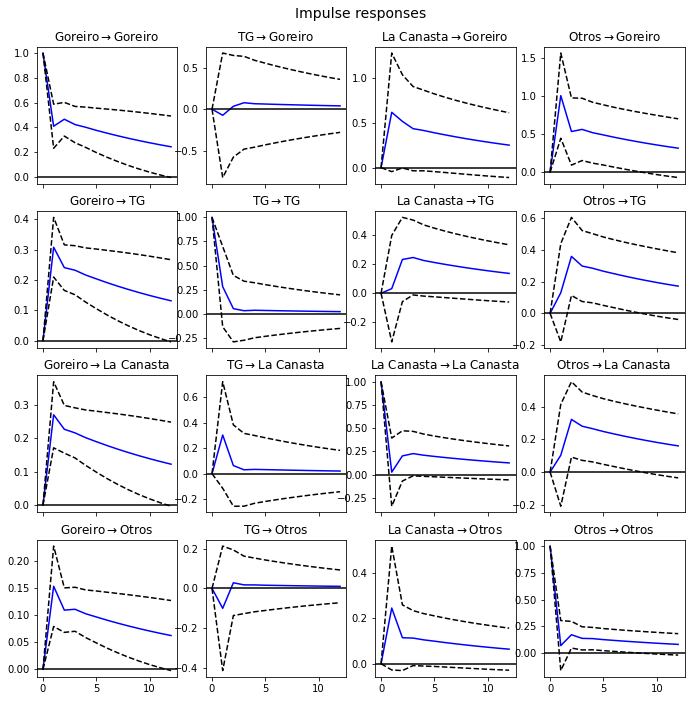


 --------------------------------------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------------------------------------- 

Data aplicativos móviles

 --------------------------------------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------------------------------------- 



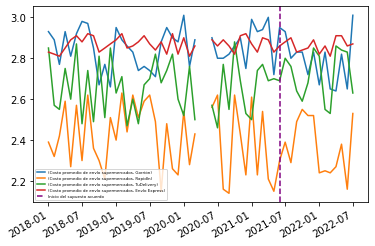

 --------------------------------------------------------------------------------------------------------------- 

HHI:
2760.004187518011

 --------------------------------------------------------------------------------------------------------------- 



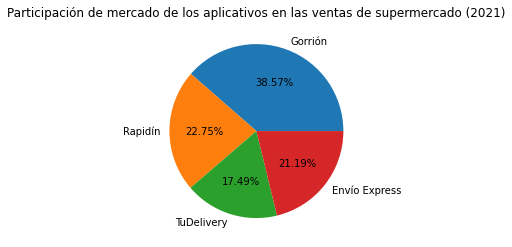

In [1]:
print("")
print(" --------------------------------------------------------------------------------------------------------------- ")
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")
print("Data aplicativos móviles")
print("")
print(" --------------------------------------------------------------------------------------------------------------- ")
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")

import pandas as pd
import numpy as np
import pmdarima
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Para instalar pmdarima es "pip install pmdarima"

from os import rmdir
from os import remove
import shutil
import os
import requests

print("Información Confidencial Flash")

dir2="anexo"
link2="https://moot.up.edu.pe/anexo2.xlsx"
 
try:
    shutil.rmtree(dir2)
except OSError as e:
     pass

os.mkdir(dir2)

req = requests.get(link2)
filename = link2.split('/')[-1]

with open("{}/anexo2.xlsx".format(dir2),'wb') as output_file:
    output_file.write(req.content)
    
anexo=pd.read_excel("{}/anexo2.xlsx".format(dir2),sheet_name="Información Confidencial Flash")

def ticket(x):
    if "Ticket" in x:
        return True
    elif "tickets" in x:
        return True
    else:
        return False
    
anexo2=anexo.iloc[:,1:]

lista1=[]
i=0

for x in list(anexo2["Unnamed: 1"]):
    if ticket(str(x))==True:
        i+=1
    lista1.append(i)
    
anexo2["grupo"]=lista1
anexo3=anexo2.rename(columns=anexo2.iloc[0]).iloc[2:,:]

data_list=[]
for x in range(10):
    data_list.append(anexo3.loc[anexo2["grupo"]==x+1])
    
lista2=[]
for x in range(10):
    data_anexo=anexo3.loc[anexo2["grupo"]==x+1].T
    data_anexo2=data_anexo.iloc[:-1,:]
    data_anexo3=data_anexo2.rename(columns=data_anexo2.iloc[0]).iloc[2:,1:]

    arrays = [[data_anexo2.iloc[0,0] for x in range(len(list(data_anexo3.columns.values)))],list(data_anexo3.columns.values)]
    tuples = list(zip(*arrays))
    index1 = pd.MultiIndex.from_tuples(tuples)

    data_anexo3.columns=pd.MultiIndex.from_tuples(index1)
    lista2.append(data_anexo3)
    
data_final=pd.concat(lista2, axis=1).iloc[:,:-3]

prom_tickets=data_final.iloc[:,:17]
num_tickets=data_final.iloc[:,17:]

ingresos_tickets=prom_tickets.iloc[:,8:12].droplevel(level=0, axis=1)*num_tickets.iloc[:,8:12].droplevel(level=0, axis=1)
arrays = [["Ingreso por afiliado - supermercados" for x in range(len(list(ingresos_tickets.columns.values)))],list(ingresos_tickets.columns.values)]
tuples = list(zip(*arrays))
index1 = pd.MultiIndex.from_tuples(tuples)

ingresos_tickets.columns=pd.MultiIndex.from_tuples(index1)

ingresos_tickets.iloc[36:,:].plot()
pyplot.title('Ingreso por afiliado')
pyplot.axvline(x = "2021-06-01", color = 'purple', label = 'Inicio del supuesto acuerdo',linestyle="--")
pyplot.legend(loc='upper left',prop={'size': 7})
pyplot.savefig('Ingreso por afiliado.jpg')
pyplot.show()


prom_tickets.iloc[65:,8:12].plot()
pyplot.title('Ticket promedio por afiliado')
pyplot.axvline(x = "2021-06-01", color = 'purple', label = 'Inicio del supuesto acuerdo',linestyle="--")
pyplot.legend(loc='lower right',prop={'size': 7})
pyplot.savefig('Ticket promedio por afiliado.jpg')
pyplot.show()

num_tickets.iloc[65:,8:12].plot()
pyplot.title('Numero de tickets por afiliado')
pyplot.axvline(x = "2021-06-01", color = 'purple', label = 'Inicio del supuesto acuerdo',linestyle="--")
pyplot.legend(loc='upper left',prop={'size': 7})
pyplot.savefig('Numero de tickets por afiliado.jpg')
pyplot.show()

ing20202021=ingresos_tickets.droplevel(level=0, axis=1).iloc[65:66,:].sum()
pyplot.pie(list(ing20202021),labels=tuple(ing20202021.index),autopct='%.2f%%')
pyplot.title('Ingresos en Junio 2020')
pyplot.savefig('Ingresos en Junio 2020.jpg')
pyplot.show()

ing20202021=ingresos_tickets.droplevel(level=0, axis=1).iloc[77:78,:].sum()
pyplot.pie(list(ing20202021),labels=tuple(ing20202021.index),autopct='%.2f%%')
pyplot.title('Ingresos en Junio 2021')
pyplot.savefig('Ingresos en Junio 2021.jpg')
pyplot.show()

ing20202021=ingresos_tickets.droplevel(level=0, axis=1).iloc[90:91,:].sum()
pyplot.pie(list(ing20202021),labels=tuple(ing20202021.index),autopct='%.2f%%')
pyplot.title('Ingresos en Julio 2022')
pyplot.savefig('Ingresos en Julio 2022.jpg')
pyplot.show()

print(" --------------------------------------------------------------------------------------------------------------- ")

model=pmdarima.arima.auto_arima(ingresos_tickets.iloc[:,0])
print(model)
a1=ingresos_tickets.iloc[:,0]-pd.DataFrame(model.resid(),index=ingresos_tickets.iloc[:,0].index).iloc[:,0]

fig, ax = pyplot.subplots(1, 1, figsize=(15, 5))
ax.set_title("Goreiro serie estandarizada")
ax.plot(ingresos_tickets.iloc[:,0])
ax.plot(a1)
pyplot.show()

print(" --------------------------------------------------------------------------------------------------------------- ")

model2=pmdarima.arima.auto_arima(ingresos_tickets.iloc[:,1])
print(model2)
a2=ingresos_tickets.iloc[:,1]-pd.DataFrame(model2.resid(),index=ingresos_tickets.iloc[:,1].index).iloc[:,0]

fig, ax = pyplot.subplots(1, 1, figsize=(15, 5))
ax.set_title("Tiendas genovia serie estandarizada")
ax.plot(ingresos_tickets.iloc[:,1])
ax.plot(a2)
pyplot.show()

print(" --------------------------------------------------------------------------------------------------------------- ")

model3=pmdarima.arima.auto_arima(ingresos_tickets.iloc[:,2])
print(model3)
a3=ingresos_tickets.iloc[:,2]-pd.DataFrame(model2.resid(),index=ingresos_tickets.iloc[:,2].index).iloc[:,0]

fig, ax = pyplot.subplots(1, 1, figsize=(15, 5))
ax.set_title("La canasta serie estandarizada")
ax.plot(ingresos_tickets.iloc[:,2])
ax.plot(a3)
pyplot.show()

print(" --------------------------------------------------------------------------------------------------------------- ")

var=ingresos_tickets.droplevel(level=0, axis=1).applymap(lambda x: int(x)).rename(columns={"Tiendas Genovia":"TG"}).reset_index(drop=True)
model = VAR(var)

pyplot.text(0.01, 0.05, str(model.fit().summary()), {'fontsize': 11}, fontproperties = 'monospace')
pyplot.axis('off')
pyplot.tight_layout()
pyplot.savefig('VAR.jpg')
pyplot.show()

print(" --------------------------------------------------------------------------------------------------------------- ")

irf = model.fit().irf(12)
irf.plot(orth=False).savefig('impulse response.jpg')
pyplot.show()

print("")
print(" --------------------------------------------------------------------------------------------------------------- ")
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")
print("Data aplicativos móviles")
print("")
print(" --------------------------------------------------------------------------------------------------------------- ")
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")

data=pd.read_excel("{}/anexo2.xlsx".format(dir2),sheet_name="Data aplicativos móviles (i)")

def ticket2(x):
    if "Ticket" in x:
        return True
    elif "tickets" in x:
        return True
    elif "Costo" in x:
        return True
    elif "locales" in x:
        return True
    else:
        return False
    
data2=data.iloc[1:,1:]

list1=[]
i=0

for x in list(data2["Unnamed: 1"]):
    if ticket2(str(x))==True:
        i+=1
    list1.append(i)
    
data2["grupo2"]=list1
data3=data2.rename(columns=data2.iloc[0]).iloc[5:,:]

data_list2=[]
for x in range(16):
    data_list2.append(data3.loc[data2["grupo2"]==x+1])

list2=[]
for x in range(16):
    data_data=data3.loc[data2["grupo2"]==x+1].T
    data_data2=data_data.iloc[:-1,:]
    data_data3=data_data2.rename(columns=data_data2.iloc[0]).iloc[2:,1:]

    arrays2 = [[data_data2.iloc[0,0] for x in range(len(list(data_data3.columns.values)))],list(data_data3.columns.values)]
    tuples2 = list(zip(*arrays2))
    index2 = pd.MultiIndex.from_tuples(tuples2)

    data_data3.columns=pd.MultiIndex.from_tuples(index2)
    list2.append(data_data3)
    
data_final2=pd.concat(list2, axis=1).iloc[:,:]

data_final2.iloc[36:,48:52].plot()
pyplot.axvline(x = "2021-06-01", color = 'purple', label = 'Inicio del supuesto acuerdo',linestyle="--")
pyplot.legend(loc='lower left',prop={'size': 4})
pyplot.savefig('c1.jpg')
pyplot.show()

ingresos_tickets2=data_final2.iloc[:,28:32].droplevel(level=0, axis=1)*data_final2.iloc[:,8:12].droplevel(level=0, axis=1)
hhi0=ingresos_tickets2.iloc[72:84,:].copy()
list1=[]
list2=[]
for x in list(hhi0.columns):
    list1.append(hhi0.sum().loc[x]/hhi0.sum().sum())
    list2.append(x)
#este es el hhi xd
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")
print("HHI:")
print(sum(list(map(lambda x: x**2,list1)))*10000)
print("")
print(" --------------------------------------------------------------------------------------------------------------- ")
print("")
pyplot.pie(list1,labels=tuple(list2),autopct='%.2f%%')
pyplot.title('Participación de mercado de los aplicativos en las ventas de supermercado (2021)')
pyplot.savefig('Participación de mercado de los aplicativos en las ventas de supermercado (2021).jpg')
pyplot.show()